### 找到一个轴，使得样本空间的所有点映射到这个轴后，方差最大
#### 对所有的样本进行行demean处理，将样例的均值归为0
#### 我们想要求一个轴的方向 w = (w1, w2)，使得我们所有的样本，映射到w以后，有方差最大
#### 一个目标函数的最优化问题，使用梯度上升法解决

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))

In [3]:
X[:, 0] = np.random.uniform(0, 10, 100)
X[:, 1] = 0.75 * X[:, 0] + np.random.normal(0, 1, size=100)

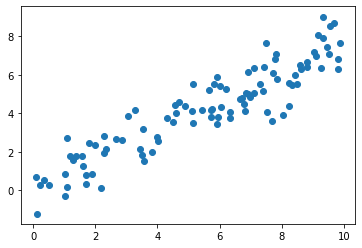

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

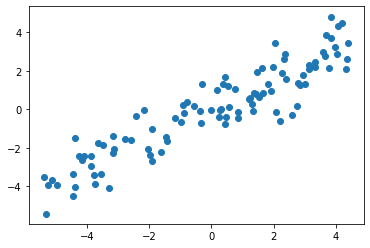

In [7]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

## 梯度上升法解决主成分分析问题

### Var(X) = (∑(X (i ) ⋅ w)2) / m

### ∇f = XT (Xw) *2 / m

In [8]:
def f_pca(X, w):
    return np.sum(X.dot(w) ** 2) / len(X) 

In [9]:
# 数学推导公式求导数
def df_math(X, w):
    return X.T.dot(X.dot(w)) * 2 / len(X)

# debug求导数
def df_debug(X, w, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(res)):
        w_1 = w.copy()
        w_1[i] = w_1[i] + epsilon
        w_2 = w.copy()
        w_2[i] = w_2[i] - epsilon
        res[i] = (f_pca(X, w_1) - f_pca(X, w_2)) / (2 * epsilon)
    return res

In [10]:
# 求单位向量
def direction(w):
    return w / np.linalg.norm(w)

# 注意1：每次求一个单位方向
# 注意2：不能用0向量开始
# 注意3： 不能使用StandardScaler标准化数据
def gradient_ascent(df, X, w, eta=0.01, epsilon=1e-8, n_iters=1e4):
    i_iter = 1
    w = direction(w)
    
    while i_iter < n_iters:
        gradient = df(X, w)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if abs(f_pca(X, last_w) - f_pca(X, w)) < epsilon:
            break
        i_iter = i_iter + 1
    
    return w

In [11]:
w = np.random.rand(X_demean.shape[1])

In [12]:
gradient_ascent(df_math, X_demean, w)

array([0.78824714, 0.6153588 ])

In [13]:
gradient_ascent(df_debug, X_demean, w)

array([0.78824714, 0.6153588 ])

In [14]:
w = gradient_ascent(df_math, X_demean, w)

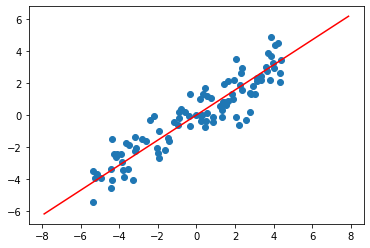

In [15]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([w[0]*-10, w[0], w[0]*10], [w[1]*-10, w[1], w[1]*10], color="r")
plt.show()